In [2]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns

import msyexp.datasets as ds
import msyexp.diffexp as yd
import msyexp.general as general
import msyexp.plotfuncs as pf
import msyexp.xytools as xytools

%matplotlib inline

In [3]:
outdir = '{}/sexbias'.format(ds.paths.NBOUTDIR)
if not os.path.exists(outdir):
    os.mkdir(outdir)

In [4]:
data = ds.get_gtex_data(males_only=False, adjusted=True)
meta = ds.get_metadata()
meta_ = meta.set_index('SAMPID')

Read in results from differential expression analysis performed with limma

In [5]:
res = ds.get_limma_sexbias()

In [6]:
res

,pair,tissue,median_XX_cts,log2(XY/XX),pval,qval
0,DDX3X/DDX3Y,Brain - Cerebellum,7.41,0.60,9.620000e-37,1.150000e-33
1,DDX3X/DDX3Y,Brain - Cortex,7.02,0.22,4.120000e-11,2.390000e-08
2,DDX3X/DDX3Y,Artery - Tibial,8.22,0.21,1.100000e-09,4.610000e-07
3,DDX3X/DDX3Y,Thyroid,8.25,0.21,4.590000e-09,2.240000e-06
4,DDX3X/DDX3Y,Esophagus - Muscularis,8.23,0.18,9.500000e-07,2.540000e-04
...,...,...,...,...,...,...
424,ZFX/ZFY,Artery - Aorta,5.20,0.00,9.520000e-01,9.930000e-01
425,ZFX/ZFY,Nerve,5.58,0.00,9.680000e-01,9.970000e-01
426,ZFX/ZFY,Brain - Hippocampus,4.27,0.00,9.890000e-01,9.980000e-01
427,ZFX/ZFY,Brain - Substantia nigra,4.20,0.07,3.790000e-01,1.000000e+00


For each pair, show where XY/XX ratio is highest

In [7]:
res_hi = res.sort_values('log2(XY/XX)', ascending=False).groupby('pair').first()
res_hi['XY/XX'] = 2**res_hi['log2(XY/XX)']
res_hi

,tissue,median_XX_cts,log2(XY/XX),pval,qval,XY/XX
pair,,,,,,
DDX3X/DDX3Y,Brain - Cerebellum,7.41,0.60,9.620000e-37,1.150000e-33,1.515717
EIF1AX/EIF1AY,Heart - Left Ventricle,4.68,2.37,1.190000e-63,5.080000e-60,5.169411
KDM5C/KDM5D,Adrenal Gland,6.68,1.08,2.710000e-50,6.650000e-47,2.114036
KDM6A/UTY,Brain - Amygdala,3.45,0.52,3.630000e-08,3.930000e-05,1.433955
NLGN4X/NLGN4Y,Adrenal Gland,-2.21,3.96,1.390000e-53,5.110000e-50,15.562479
PCDH11X/PCDH11Y,Brain - Hippocampus,0.10,1.77,5.790000e-06,4.760000e-03,3.410540
PRKX/PRKY,Heart - Atrial Appendage,2.58,1.45,9.830000e-73,3.400000e-69,2.732081
RPS4X/RPS4Y1,Adrenal Gland,8.86,0.31,2.860000e-10,2.340000e-07,1.239708
TBL1X/TBL1Y,Thyroid,5.26,0.49,3.060000e-28,3.690000e-25,1.404445


...and lowest

In [8]:
res_lo = res.loc[res.pval.notnull()]
res_lo = res_lo.sort_values('log2(XY/XX)').groupby('pair').first()
res_lo['XY/XX'] = 2**res_lo['log2(XY/XX)']
res_lo

,tissue,median_XX_cts,log2(XY/XX),pval,qval,XY/XX
pair,,,,,,
DDX3X/DDX3Y,Skeletal Muscle,7.86,-0.06,1.840000e-01,5.680000e-01,0.959264
EIF1AX/EIF1AY,Skin,6.30,0.20,1.480000e-07,1.940000e-05,1.148698
KDM5C/KDM5D,Esophagus - Mucosa,7.21,0.25,2.500000e-26,2.310000e-23,1.189207
KDM6A/UTY,Liver,4.49,0.04,4.720000e-01,8.990000e-01,1.028114
NLGN4X/NLGN4Y,Heart - Atrial Appendage,3.28,0.17,1.380000e-01,6.210000e-01,1.125058
PCDH11X/PCDH11Y,Pancreas,-1.03,-0.12,2.420000e-01,9.020000e-01,0.920188
PRKX/PRKY,Thyroid,7.29,-0.20,3.100000e-03,6.220000e-02,0.870551
RPS4X/RPS4Y1,Pituitary,9.98,-0.23,5.400000e-03,2.500000e-01,0.852635
TBL1X/TBL1Y,Artery - Aorta,6.27,-0.25,2.310000e-03,1.310000e-01,0.840896


Plot

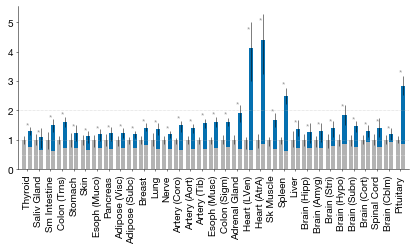

In [9]:
gx = 'EIF1AX'
gy = 'EIF1AY'
fig, ax = plt.subplots(figsize=(7, 3))
qvals = res.loc[res.pair.str.startswith(gx)].set_index('tissue')['qval']
fig, ax = yd.plot_xx_vs_xy_stackedbar(data, meta, gx, gy, ax=ax,
                                      pvals=qvals)

Plot all except NLGN4X/NLGN4Y, which can be seen in an earlier plot (Supplemental Fig. S5)

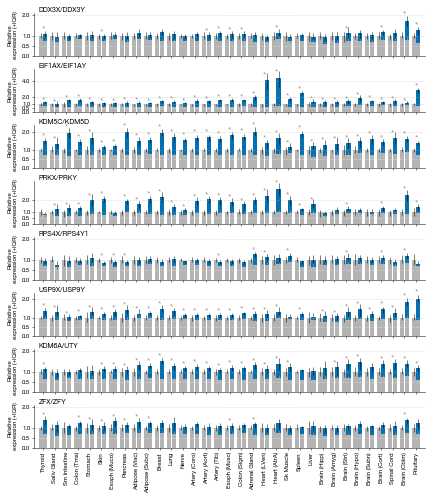

In [10]:
fig, axes = plt.subplots(8, 1, figsize=(7, 8))
fig.subplots_adjust(hspace=0.3)

ygenes = list(filter(lambda g: g!='NLGN4Y', xytools.XYPAIRS_Y9))
xgenes = list(filter(lambda g: g!='NLGN4X', xytools.XYPAIRS_X9))

for i, (ax, gx, gy) in enumerate(zip(axes, xgenes, ygenes)):
    qvals = res.loc[res.pair.str.startswith(gx)].set_index('tissue')['qval']
    
    fig, ax = yd.plot_xx_vs_xy_stackedbar(data, meta, gx, gy, ax=ax, pad=0.05, 
                                          show_xm_err=True, pvals=qvals)
    ax = pf.format_axis_labels(ax)
    if i != 7:
        ax.set_xticklabels([])
    ax.set_ylabel('Relative\nexpression (+IQR)', size=6)
    if gy == 'EIF1AY':
        ax.set_yticks([0, 0.5, 1, 2, 4])
        ax.plot(ax.get_xlim(), [4, 4], lw=0.5, ls=':', color='0.7', zorder=1)
    else:
        ax.set_yticks([0, 0.5, 1, 2])
    ylim = ax.get_ylim()
    ax.text(-0.375, ylim[1], '{0}/{1}'.format(gx, gy), size=7, style='italic',
            horizontalalignment='left', verticalalignment='bottom')
    
fig.savefig("{}/xx_vs_xy.with_significance.limma.pdf".format(outdir))

### Compare sex bias to degree of X–Y co-expression

Note: this analysis requires output from `coexpression_analyses.ipynb`, which thus must be run first

In [11]:
coexp = pd.read_csv("{}/coexpression/xycoexpression.txt".format(ds.paths.NBOUTDIR), sep='\t')
coexp.head()

,pair,X_homolog,Y_homolog,tissue,spearman_r,spearman_p,rank_X(Y),rank_Y(X),avg_rank
0,DDX3X/DDX3Y,DDX3X,DDX3Y,Skeletal Muscle,0.684296,1.457598e-36,9.0,5.0,0.000594
1,EIF1AX/EIF1AY,EIF1AX,EIF1AY,Skeletal Muscle,0.075769,2.279223e-01,5308.0,2669.0,0.338209
2,KDM5C/KDM5D,KDM5C,KDM5D,Skeletal Muscle,0.349569,9.650652e-09,477.0,190.0,0.028279
3,PRKX/PRKY,PRKX,PRKY,Skeletal Muscle,0.503399,8.669396e-18,72.0,6.0,0.003307
4,RPS4X/RPS4Y1,RPS4X,RPS4Y1,Skeletal Muscle,0.785041,1.515409e-54,8.0,8.0,0.000678


In [12]:
for gx, gy in zip(xgenes, ygenes):
    pair = '{0}/{1}'.format(gx, gy)
    coexp_xy = coexp.loc[coexp['pair']==pair].set_index('tissue')['spearman_r']
    diff_xy = res.loc[res['pair']==pair].set_index('tissue')['log2(XY/XX)']
    tissues_xy = list(set(coexp_xy.index) & set(diff_xy.index))
    
    r, p = ss.spearmanr(coexp_xy.loc[tissues_xy], diff_xy.loc[tissues_xy])
    print("{0:14s}: rho={1:.3f}, p={2:.4f}".format(pair, r, p))

DDX3X/DDX3Y   : rho=0.064, p=0.7237
EIF1AX/EIF1AY : rho=-0.305, p=0.0840
KDM5C/KDM5D   : rho=0.066, p=0.7164
PRKX/PRKY     : rho=0.275, p=0.1413
RPS4X/RPS4Y1  : rho=0.212, p=0.2372
USP9X/USP9Y   : rho=0.295, p=0.0954
KDM6A/UTY     : rho=-0.080, p=0.6601
ZFX/ZFY       : rho=-0.243, p=0.1736


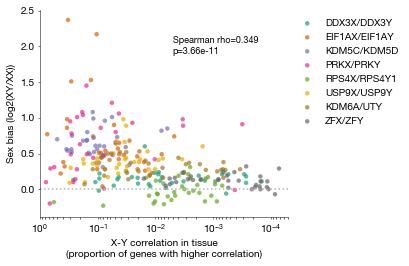

In [13]:
fig, ax = plt.subplots(figsize=(6, 4))
fig.subplots_adjust(right=0.7, top=0.92, bottom=0.2)

res2 = pd.merge(res, coexp, on=['pair', 'tissue'])

colors = sns.color_palette('Dark2', 9)
for i, (gx, gy) in enumerate(zip(xgenes, ygenes)):
    pair = '{0}/{1}'.format(gx, gy)
    ax.scatter(res2.loc[res2['pair']==pair, 'avg_rank'], 
               res2.loc[res2['pair']==pair, 'log2(XY/XX)'], 
               edgecolors='none', facecolors=colors[i],
               alpha=0.7, label=pair, s=20)
ax.set_xlabel('X-Y correlation in tissue\n(proportion of genes with higher correlation)')
ax.set_ylabel('Sex bias (log2(XY/XX))')

r, p = ss.spearmanr(res2['avg_rank'], res2['log2(XY/XX)'])
ax.text(0.005, 1.9, "Spearman rho={0:.3f}\np={1:.2e}".format(r, p),
       size=9)

ax.set_xscale('log')
ax.set_xlim(1, 5e-5)
xlim = ax.get_xlim()
ax.set_xlim(xlim)
ax.plot(xlim, [0, 0], ls=':', color='0.7')

ax.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False)
ax = pf.format_spines(ax)

fig.savefig("{}/sexbias_vs_XYcoexpression.avg_rank.pdf".format(outdir))